### 1. Importing Libraries

In [19]:
import os
import numpy as np
import pandas as pd
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import json

### 2. Gathering Data

### i. Importing Enhanced Twitter Archive Data

In [20]:
t_archive = pd.read_csv("twitter-archive-enhanced.csv")

### ii. Downloading the Tweet Image Predictions 

In [21]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [22]:
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

### iii. Getting Tweet Data From Twitter API

##### Extracting from zip file

In [23]:
with zipfile.ZipFile("tweet-json.zip", "r") as file:
    my_file = file.extractall()

##### Converting the txt file to a data list where each line contain piece of tweet info

In [24]:
df_list = []

with open("tweet-json", "r") as file:
    for line in file:
        df_list.append(json.loads(line))

In [25]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

##### Creating a DataFrame from the above list containing the id, tweet count, and favorite count

In [26]:
tw_data = pd.DataFrame(df_list, columns = ["id", "retweet_count", "favorite_count"])

In [27]:
tw_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


##### Changing the id id column name to twwet_id

In [28]:
tw_data = tw_data.rename(columns = {"id" : "tweet_id"})

In [29]:
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


##### Saving the DataFrame to a csv file  

In [30]:
tw_data.to_csv("tweet_data.csv", index = False)

##### To check if the file has saved

In [31]:
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 3. Assesing Data

#### -  Assesing Enhanced Twitter Archive Data

In [32]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
t_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2018,672139350159835138,NaN,NaN,2015-12-02 19:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672139350...,12,10,None,None,None,None,None
1413,698907974262222848,NaN,NaN,2016-02-14 16:33:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is never sure if he's doing the right...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698907974...,10,10,None,None,None,None,None
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721...,11,10,None,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None


In [34]:
t_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [35]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [36]:
t_archive["rating_numerator"].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

#### counting the number of IDs with numerators less than 10

In [37]:
t_archive[t_archive["rating_numerator"] < 10].count()[0]

440

#### checking the IDs having numerator less than 10

In [38]:
t_archive[t_archive.rating_numerator < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

#### checking rating_numerator of tweet_id 666020888022790149

In [39]:
t_archive.loc[(t_archive["tweet_id"] == 666020888022790149), "rating_numerator"]

2355    8
Name: rating_numerator, dtype: int64

#### Checking text of tweet_id 666020888022790149 using row number

In [40]:
t_archive.loc[2355, "text"]

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [41]:
t_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

##### Some denominator has a zero (0) value

#### Checking which IDs have denominators with 0 value

In [42]:
t_archive[t_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

###### Only one ID has denorminator with 0 value 

#### Checking text of tweet_id 835246439529840640 using row number

In [43]:
t_archive.loc[313, "text"]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

#### it apears like someone was trying to correct @jonnysun

In [44]:
t_archive[t_archive.rating_denominator != 10].count()[0]

23

In [45]:
t_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
              ... 
Flash            1
Banditt          1
Angel            1
infuriating      1
Jazzy            1
Name: name, Length: 957, dtype: int64

### ii. Assesing the Tweet Image Predictions

In [46]:
im_predictions = pd.read_csv("image-predictions.tsv", sep = "\t")

In [47]:
im_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
im_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [49]:
im_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
1125,727314416056803329,https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg,2,toy_poodle,0.827469,True,miniature_poodle,0.160760,True,Tibetan_terrier,0.001731,True
1733,821407182352777218,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,Irish_setter,0.505496,True,vizsla,0.168747,True,Chesapeake_Bay_retriever,0.111311,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie,0.665578,True,collie,0.176846,True,Old_English_sheepdog,0.065175,True
526,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,0.868658,True,Irish_terrier,0.027587,True,otterhound,0.025324,True


In [50]:
im_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### iii. Assesing Tweet Data from Twitter API

In [51]:
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [52]:
tw_data.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [53]:
tw_data.sample(5)

,tweet_id,retweet_count,favorite_count
1337,704871453724954624,1245,4585
1341,704761120771465216,3257,7283
134,866450705531457537,32883,106827
345,831926988323639298,39,369
572,801167903437357056,6961,27386


In [54]:
tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Tidiness

#### 1. Dog stage data is seperated into 4 columns 
#### 2. All data is related but divided into 3 seperate DataFrame

## Quality

### i. Enhanced Twitter Archive 

####  1. There are 181 retweets as indicated by retweeted_status_id
#### 2. invalid timestamp data type (string instead of datetime)
#### 3. invalid tweet_id data type (integer instead of string) 
#### 4.some dog names are invalid (like : None, a, an, & inplace of name)
#### 5. 440 rating numerators less than 10 (eg. 462)
#### 6. Row 313 has 0 denominator 
#### 7. 23 rating denominator not equal to 10

### ii. Tweet Image Predictions

#### 1. Missing photos for some IDs (2075 rows instead of 2354)
#### 2. using underscores are used in multi-word names in columns p1, p2, and p3 instead of spaces
#### 3. Some p  names start with an uppercase letter while other starts with lowercase 

## iii. Tweets Data From Twitter API

#### 1. Missing entries (only 2354 entries instead of 2356)

## 4. Cleaning Data

### i.Creating copies for the Dataframe

In [55]:
t_archive_clean = t_archive.copy()
im_predictions_clean = im_predictions.copy()
tw_data_cean = tw_data.copy()

##### inspecting the copied Dataframe

In [56]:
t_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [57]:
im_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
tw_data_cean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### ii. Cleaning Tidiness issues 

##### a. Merging the four columns into one, naming dog_stage

In [59]:
t_archive_clean["dog_stage"] = t_archive_clean["text"].str.extract("(doggo|floofer|pupper|puppo)")
t_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


#####  Drop unwanted columns

In [60]:
t_archive_clean = t_archive_clean.drop(columns = ["doggo","floofer","pupper","puppo"])

In [61]:
t_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


##### Test

In [62]:
t_archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### b. Merge all dataset into one based on the tweet_id

##### Merging the cleaned Enhanced Twitter Archived data with the Tweet Data from Twitter API

In [63]:
t_archive_clean = pd.merge(t_archive_clean, tw_data_cean, on = "tweet_id", how = "left")

##### Merging the t_archive_clean data with the Tweet Image Predictions 

In [64]:
t_archive_clean = pd.merge(t_archive_clean, im_predictions_clean, on = "tweet_id", how = "left")

### Test

In [65]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### C. Cleaning Quality Issue 

##### Drop rows that represent retweets and all reated columns

##### keeping the original tweets that have no retweet status id

In [66]:
t_archive_clean = t_archive_clean[t_archive_clean.retweeted_status_id.isnull()]

In [67]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

##### Droping related columns

In [68]:
t_archive_clean = t_archive_clean.drop(columns = ["retweeted_status_id", "retweeted_status_user_id","retweeted_status_timestamp"])

In [69]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

##### Converting invalid names to NaN and extract the correct names from the text column

In [70]:
t_archive_clean['name'] = t_archive_clean.name.replace(regex = ['^[a-z]+', 'None'], value = np.nan)

#### checking for null values after conversion

In [71]:
t_archive_clean['name'].isnull().sum()

784

#### Using function to extract names from the text column, and return NaN if there is no Named word 

In [72]:
def function(text) :
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == "named":
            name_index = txt_list.index(word)
            return txt_list[name_index]
        else:
            pass
    return np.nan

##### Using np.where() 

In [73]:
t_archive_clean['name'] = np.where(t_archive_clean.name.isnull(), t_archive_clean.text.apply(function),t_archive_clean.name)

#### Test

In [74]:
t_archive_clean['name'].isnull().sum()

761

###### Names were added in place of sum null values 

##### converting the tweet_id to string to correct the invalid data type 

In [75]:
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

##### Test

In [76]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1414 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### Delete rows with missing photos

In [77]:
t_archive_clean = t_archive_clean[t_archive_clean.jpg_url.notnull()]

#### Test

In [78]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1373 non-null   object 
 10  dog_stage              326 non-null    object 
 11  retweet_count          1994 non-null   float64
 12  favorite_count         1994 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### Replace underscore with space in multi-word in columns p1, p2, p3

In [79]:
t_archive_clean.p1 = t_archive_clean.p1.str.replace("_"," ")
t_archive_clean.p2 = t_archive_clean.p2.str.replace("_"," ")
t_archive_clean.p3 = t_archive_clean.p3.str.replace("_"," ")

#### Test

In [80]:
t_archive_clean.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [81]:
t_archive_clean.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [82]:
t_archive_clean.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

#### Convert lowercase letters to uppercase for some p names that start with lowercase 

In [83]:
t_archive_clean.p1 = t_archive_clean.p1.str.title()
t_archive_clean.p2 = t_archive_clean.p2.str.title()
t_archive_clean.p3 = t_archive_clean.p3.str.title()

#### Test

In [84]:
t_archive_clean.p1.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [85]:
t_archive_clean.p2.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object

In [86]:
t_archive_clean.p3.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object

#### Drop rows without retweets_count entries

##### The entries has been deleted in the previous steps while cleaning data 

#### Test

In [87]:
t_archive_clean.retweet_count.isnull().sum()

0

## 5. Storing Data

In [88]:
t_archive_clean.to_csv("twitter_archive_data.csv")

In [89]:
df = pd.read_csv("twitter_archive_data.csv")

## 5. Data Analysis and Visualization

##### i. The percentage of different dog stages

In [90]:
df_stage = df.dog_stage.value_counts()

In [91]:
df_stage

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

###### creating a pie chart

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

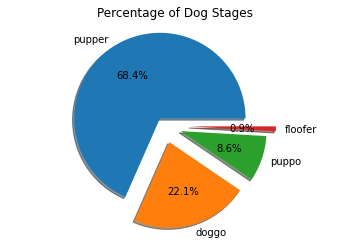

In [92]:
plt.pie(df_stage,
       labels = ["pupper","doggo","puppo","floofer"],
       autopct ='%1.1f%%',
       shadow = True,
       explode = (0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of Dog Stages')
plt.axis('equal')

### From the above pie chat we can deduce that :
##### 1. Pupper has the highest  percentage
##### 2. Floofer has the lowest percentage

#### ii. The relationship between retweet count and favorite count using scatter plot

In [93]:
def labels(x,y,z):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

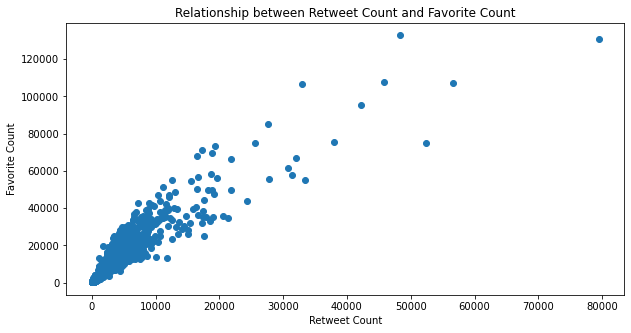

In [94]:
plt.figure(figsize =(10,5))
plt.scatter(df.retweet_count, df.favorite_count)
labels('Retweet Count', 'Favorite Count', 'Relationship between Retweet Count and Favorite Count')

##### From the chart above we can deduce that there is a linear relationship between both parameters